In [ ]:
import torch
import torch.nn as nn

In [151]:
def gambel_softmax(input_tensor, tau):

    softmax = nn.Softmax(dim=1)
    sigmoid = nn.Sigmoid()

    positive_input = sigmoid(input_tensor)

    n_class = input_tensor.shape[1]
    g = -torch.log(-torch.log(torch.rand(n_class)))
    z = softmax((torch.log(positive_input) + g) / tau)
    return z

In [152]:
torch.randn(2).to

<function Tensor.to>

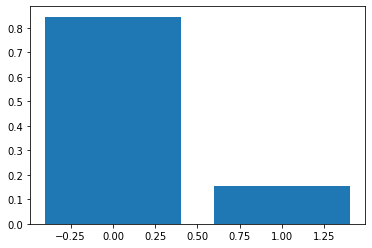

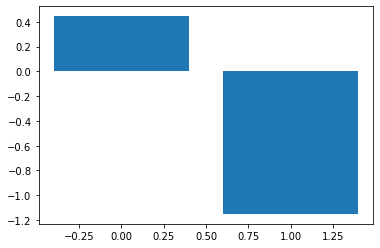

0

In [153]:
import matplotlib.pyplot as plt
import numpy as np

tensor = torch.randn(1, 2)

out = gambel_softmax(tensor, 0.1)

plt.bar(np.arange(2), out.numpy()[0])
plt.show()
plt.close()

plt.bar(np.arange(2), tensor.numpy()[0])
plt.show()
plt.close()

torch.argmax(out, dim=1).item()

In [313]:
tensor = torch.randn(1, 2)

tmp = np.zeros((1, 2))
for i in np.arange(100):
    out = gambel_softmax(tensor, 0.5)
    idx = np.argmax(out)
    tmp[:, idx] += 1

In [314]:
import torch.nn.functional as F

F.gumbel_softmax(tensor, tau=0.5, hard=False)

tensor([[1.3517e-04, 9.9986e-01]])

In [319]:
torch.log(torch.tensor(-1))

tensor(nan)

tensor([[0.0254, 0.9746]])
tensor(1.)


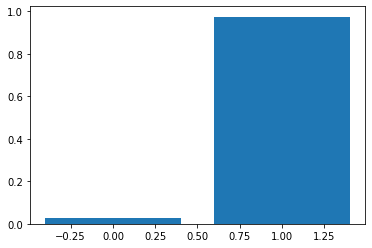

In [139]:
out = gambel_softmax(tensor, 0.1)
plt.bar(np.arange(2), out.numpy()[0])
plt.show()
plt.close()

In [142]:
l = nn.CrossEntropyLoss()
l(out, torch.tensor([1]))

tensor(0.3272)

In [ ]:
sig = nn.Sigmoid()
sig(tensor)

tensor([[0.6828, 0.8369]])

In [100]:
int(3)

3

In [102]:
int(3 > 0.5)

1

In [3]:
import torch
import numpy as np



In [22]:
tensor = torch.randn(10000, 3).to('cuda')

In [23]:
%%time 
torch.argmax(tensor, axis=1)

CPU times: user 112 µs, sys: 44 µs, total: 156 µs
Wall time: 161 µs


tensor([2, 0, 1,  ..., 1, 2, 0], device='cuda:0')

In [24]:
%%time

np.argmax(tensor.to('cpu').detach().numpy().copy(), axis=1)

CPU times: user 312 µs, sys: 63 µs, total: 375 µs
Wall time: 425 µs


array([2, 0, 1, ..., 1, 2, 0])